In [0]:
from pyspark.sql.types import (StructField, StringType, IntegerType, StructType, BooleanType, DataType, DoubleType, DecimalType, DateType) 
from pyspark.sql.functions import col, lit, when, count, countDistinct, avg, sum, max, min, round, desc, asc, substring, length, concat, regexp_replace, trim, ltrim, rtrim 
from pyspark.sql.window import Window
from pyspark.sql.functions import year, month, dayofmonth, hour, weekofyear, date_format, to_date, to_timestamp, to_utc_timestamp, from_utc_timestamp, from_unixtime, unix_timestamp, datediff, months_between, lower, regexp_replace, current_date, expr 
import seaborn as sns

In [0]:
from pyspark.sql import SparkSession

#create session 
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate() 

In [0]:
SparkSession

Out[25]: pyspark.sql.session.SparkSession

In [0]:
def files_exists(path):
  try:
    dbutils.fs.ls(path)
    dbutils.fs.ls(path)
  except Exception as e:
    if 'java.io.FileNotFoundException' in str(e):
      return False
    else:
      raise 

In [0]:
mount_point = '/mnt/ipl_data'
files_exists(mount_point)

Out[27]: False

In [0]:
IPLContainerKey=dbutils.secrets.get("GetIPLContainer", "IPLContainerKey")
IPLContainervalue=dbutils.secrets.get("GetIPLContainer", "IPLContainervalue")

In [0]:
dbutils.secrets.listScopes()

Out[29]: [SecretScope(name='GetIPLContainer')]

In [0]:
dbutils.secrets.list(scope = 'GetIPLContainer')

Out[30]: [SecretMetadata(key='IPLContainerKey'),
 SecretMetadata(key='IPLContainerValue')]

In [0]:
storage_account_name = "dewanshu"
container_name = "project"
access_key = "cfagayB4rVkvw5R+8w7jfWl5ad/dZqerwY/nPj1DLutZ7UThQg4QQer3c+aHWph986adW6iDQfM++AStbax5aQ=="

# Check if the directory is already mounted
mount_point = f"/mnt/{container_name}"
if any(mount.mountPoint == mount_point for mount in dbutils.fs.mounts()):
    dbutils.fs.unmount(mount_point)

# Mount the Container 
dbutils.fs.mount(
  source = f"wasbs://{container_name}@{storage_account_name}.blob.core.windows.net/",
  mount_point = mount_point,
  extra_configs = {f"fs.azure.account.key.{storage_account_name}.blob.core.windows.net": access_key}
)

/mnt/project has been unmounted.
Out[31]: True

In [0]:
display(dbutils.fs.ls(mount_point)) 

path,name,size,modificationTime
dbfs:/mnt/project/Ball_By_Ball.csv,Ball_By_Ball.csv,25099132,1732024281000
dbfs:/mnt/project/Match.csv,Match.csv,113358,1732093560000
dbfs:/mnt/project/Player.csv,Player.csv,34614,1732093559000
dbfs:/mnt/project/Player_match.csv,Player_match.csv,2664692,1732093560000
dbfs:/mnt/project/Team.csv,Team.csv,343,1732093559000


In [0]:
display(dbutils.fs.ls(mount_point)) 

path,name,size,modificationTime
dbfs:/mnt/project/Ball_By_Ball.csv,Ball_By_Ball.csv,25099132,1732024281000
dbfs:/mnt/project/Match.csv,Match.csv,113358,1732093560000
dbfs:/mnt/project/Player.csv,Player.csv,34614,1732093559000
dbfs:/mnt/project/Player_match.csv,Player_match.csv,2664692,1732093560000
dbfs:/mnt/project/Team.csv,Team.csv,343,1732093559000


In [0]:
df = spark.read.csv((mount_point), header=True, inferSchema=True) 

In [0]:
display(dbutils.fs.ls(mount_point)) 

path,name,size,modificationTime
dbfs:/mnt/project/Ball_By_Ball.csv,Ball_By_Ball.csv,25099132,1732024281000
dbfs:/mnt/project/Match.csv,Match.csv,113358,1732093560000
dbfs:/mnt/project/Player.csv,Player.csv,34614,1732093559000
dbfs:/mnt/project/Player_match.csv,Player_match.csv,2664692,1732093560000
dbfs:/mnt/project/Team.csv,Team.csv,343,1732093559000


In [0]:
file_path = "dbfs:/mnt/project/Match.csv"

In [0]:
display 

Out[37]: <bound method Display.display of <dbruntime.display.Display object at 0x7f82ab687d00>>

In [0]:
spark.catalog.listTables()

Out[38]: []

In [0]:
ball_by_ball_schema = StructType([
   StructField("match_id", IntegerType(), True),
   StructField("over_id", IntegerType(), True),
   StructField("ball_id", IntegerType(), True), 
   StructField("innings_no", IntegerType(), True), 
   StructField("team_batting", StringType(), True), 
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)


]

)
df = spark.read.csv((mount_point), header=True, schema=(ball_by_ball_schema))


In [0]:
# Define the path to the file
file_path = "dbfs:/mnt/project/Match.csv"

# Read the file into a DataFrame
match_df = spark.read.csv(file_path, header=True, inferSchema=True)

match_schema = StructType([
  StructField("Match_SK", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),  
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

match_df = spark.read.csv(file_path, header=True, schema=match_schema)

In [0]:
 # Define the path to the file
file_path = "dbfs:/mnt/project/Player.csv"

# Read the file into a DataFrame
player_df = spark.read.csv(file_path, header=True, inferSchema=True)

player_schema = StructType([
  StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.csv(file_path, header=True, schema=player_schema)

In [0]:
# Define the path to the file
file_path = "dbfs:/mnt/project/Player_match.csv"

# Read the file into a DataFrame
player_match_df = spark.read.csv(file_path, header=True, inferSchema=True)

player_match_schema = StructType([
   StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(10, 0), True),  
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),  
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.csv(file_path, header=True, schema=player_match_schema)

In [0]:
# Define the path to the file
file_path = "dbfs:/mnt/project/Team.csv"

# Read the file into a DataFrame
team_df = spark.read.csv(file_path, header=True, inferSchema=True)

In [0]:
df.createOrReplaceTempView("df")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
# Filter to include only valid delevieries (excluding extras like wides and no balls for specific analysis)
df = df.filter((col("wides") == 0) & (col("noballs") == 0) & (col("legbyes") == 0) & (col("byes") == 0))

In [0]:
# Aggregation: Calculate the total and average runs scored in each match and inning 
total_and_avg_runs = df.groupBy("match_id", "innings_no").agg(
  sum("runs_scored").alias("total_runs"),
  avg("runs_scored").alias("avg_runs")
)
total_and_avg_runs.show(5) 

+--------+----------+----------+------------------+
|match_id|innings_no|total_runs|          avg_runs|
+--------+----------+----------+------------------+
|  980940|         1|       138|1.1596638655462186|
|  419132|         1|       162|1.3728813559322033|
|  336009|         1|       151|1.2905982905982907|
|  501203|         1|       150|1.2605042016806722|
|  598022|         4|        11|1.8333333333333333|
+--------+----------+----------+------------------+
only showing top 5 rows



In [0]:
# Window function: Calculate the running total of runs in each match for each over 
windowSpec = Window.partitionBy("match_id", "innings_no").orderBy("over_id")

df = df.withColumn("running_total_runs", sum("runs_scored").over(windowSpec))

In [0]:
# Conditional Columns: Flag for high impact balls (either a wicket or more than 6 runs including extras)
df = df.withColumn("high_impact_ball", when(col("runs_scored") + col("extra_runs") > 6, True).otherwise(False))

In [0]:
# Extracting year, month, and day from the match date for more detailed time-based analysis 
match_df = match_df.withColumn("match_year", year(col("match_date")))
match_df = match_df.withColumn("match_month", month(col("match_date")))
match_df = match_df.withColumn("match_day", dayofmonth(col("match_date")))

# High margin win : categorizing with margins into 'high' , 'medium' and 'low'
match_df = match_df.withColumn("win_margin_category", 
    when(col("win_margin") >= 100, "high")
    .when((col("win_margin") > 50) & (col("win_margin") <= 100), "medium")
    .otherwise("low")
) 

# Analyze the impact of the toss decision on the outcome of the match
match_df = match_df.withColumn("toss_decision_impact", 
    when(col("toss_name") == col("match_winner"), "Yes")
    .otherwise("No")
)

display(match_df.limit(5))

Match_SK,match_id,team1,team2,match_date,season_year,venue_name,city_name,country_name,toss_winner,match_winner,toss_name,win_type,outcome_type,manofmach,win_margin,country_id,match_year,match_month,match_day,win_margin_category,toss_decision_impact
0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,null,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140,1,null,null,null,high,No
1,335988,Kings XI Punjab,Chennai Super Kings,null,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33,1,null,null,null,low,No
2,335989,Delhi Daredevils,Rajasthan Royals,null,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9,1,null,null,null,low,No
3,335990,Mumbai Indians,Royal Challengers Bangalore,null,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5,1,null,null,null,low,No
4,335991,Kolkata Knight Riders,Deccan Chargers,null,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5,1,null,null,null,low,No


In [0]:
# Normalize and clean player names 
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9]", "")))
# Handle the missing values in 'batting_hand' and 'bowling_skill' columns with a default 'unknown' value
player_df = player_df.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown"}) 

# Categorizing players based on batting hand 
player_df = player_df.withColumn(
    "batting_hand_category", 
    when(col("batting_hand") == "Right-hand bat", "Right-hand bat").otherwise("Left-hand bat"))

display(player_df.limit(5))

player_sk,player_id,player_name,dob,batting_hand,bowling_skill,country_name,batting_hand_category
0,1,scganguly,null,Left-hand bat,Right-arm medium,India,Left-hand bat
1,2,bbmccullum,null,Right-hand bat,Right-arm medium,New Zealand,Right-hand bat
2,3,rtponting,null,Right-hand bat,Right-arm medium,Australia,Right-hand bat
3,4,djhussey,null,Right-hand bat,Right-arm offbreak,Australia,Right-hand bat
4,5,mohammadhafeez,null,Right-hand bat,Right-arm offbreak,Pakistan,Right-hand bat


In [0]:
# Add a 'veteran_status' column based on player age 
player_match_df = player_match_df.withColumn("veteran_status", when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")) 

# Filter to include only the players who have played the match (excluding bench players)
player_match_df = player_match_df.filter(col("batting_status") != "Did Not Bat") 

# Dynamic column to calculate years since debut 
player_match_df = player_match_df.withColumn("years_since_debut", (year(current_date()) - col("season_year")))
display(player_match_df.limit(5))

player_match_sk,playermatch_key,match_id,player_id,player_name,dob,batting_hand,bowling_skill,country_name,role_desc,player_team,opposit_team,season_year,is_manofthematch,age_as_on_match,isplayers_team_won,batting_status,bowling_status,player_captain,opposit_captain,player_keeper,opposit_keeper,veteran_status,years_since_debut


In [0]:
# Define the SQL query
query = """
SELECT 
    pm.player_name,
    m.season_year AS season_year,
    SUM(b.runs_scored) AS total_runs
FROM df b
JOIN match m ON b.match_id = m.match_id
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id
GROUP BY pm.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
"""

# Execute the query and store the result in a DataFrame
top_scoring_batsmen_per_season = spark.sql(query)

# Display the DataFrame
display(top_scoring_batsmen_per_season)

player_name,season_year,total_runs
SE Marsh,2008,616
G Gambhir,2008,534
ST Jayasuriya,2008,514
SR Watson,2008,468
GC Smith,2008,441
AC Gilchrist,2008,436
YK Pathan,2008,435
SK Raina,2008,421
MS Dhoni,2008,414
V Sehwag,2008,406


In [0]:
economical_bowlers_powerplay = spark.sql("""
  SELECT pm.player_name, 
         AVG(df.runs_scored) AS avg_runs_per_ball, 
         COUNT(df.bowler_wicket) AS total_wickets 
  FROM df 
  JOIN player_match pm ON df.match_id = pm.match_id
  WHERE df.over_id <= 6 
  GROUP BY pm.player_name
  HAVING COUNT(*) > 120
  ORDER BY avg_runs_per_ball, total_wickets DESC                                   
""")
display(economical_bowlers_powerplay)

player_name,avg_runs_per_ball,total_wickets
T Henderson,0.7171052631578947,0
DT Patil,0.821656050955414,0
D du Preez,0.8410596026490066,0
JJ van der Wath,0.8508771929824561,0
DJ Jacobs,0.8709055876685935,0
B Laughlin,0.88,0
CJ McKay,0.9,0
LA Carseldine,0.9164420485175202,0
NK Patel,0.917037037037037,0
BMAJ Mendis,0.9244444444444444,0


In [0]:
# Check if the table exists
table_exists = spark.sql("SHOW TABLES LIKE 'match'").count() > 0

if table_exists:
    # Assuming the table exists, run the query
    toss_impact_individual_matches = spark.sql("""
        SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
            CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_impact
        FROM match m 
        WHERE m.toss_name IS NOT NULL 
        ORDER BY m.match_id
    """)
    display(toss_impact_individual_matches)
else:
    print("Table 'match' does not exist.")
    

match_id,toss_winner,toss_name,match_winner,match_impact
335987,Royal Challengers Bangalore,field,Kolkata Knight Riders,Lost
335988,Chennai Super Kings,bat,Chennai Super Kings,Won
335989,Rajasthan Royals,bat,Delhi Daredevils,Lost
335990,Mumbai Indians,bat,Royal Challengers Bangalore,Lost
335991,Deccan Chargers,bat,Kolkata Knight Riders,Lost
335992,Kings XI Punjab,bat,Rajasthan Royals,Lost
335993,Deccan Chargers,bat,Delhi Daredevils,Lost
335994,Mumbai Indians,field,Chennai Super Kings,Lost
335995,Rajasthan Royals,field,Rajasthan Royals,Won
335996,Mumbai Indians,field,Kings XI Punjab,Lost


In [0]:
average_runs_in_wins = spark.sql("""
SELECT p.player_name, AVG(df.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM df
JOIN player_match pm ON df.match_id = pm.match_id AND df.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins DESC
""")
average_runs_in_wins.show()

+--------------+------------------+--------------+
|   player_name|  avg_runs_in_wins|innings_played|
+--------------+------------------+--------------+
|   Rashid Khan|               6.0|             1|
| Shahid Afridi|3.3333333333333335|             6|
|      AN Ahmed|               3.0|             3|
|      BA Bhatt|               3.0|             2|
|       SN Khan|2.5789473684210527|            19|
|    SP Jackson|               2.4|             5|
| Harmeet Singh|2.3333333333333335|             6|
|      Umar Gul|2.3076923076923075|            13|
|       MS Gony|               2.0|            31|
| Shivam Sharma|               2.0|             2|
|   DS Kulkarni|               2.0|             3|
|MJ McClenaghan|               2.0|            11|
|     VRV Singh|               2.0|             2|
|      RS Sodhi|               2.0|             2|
|    SM Pollock|1.9411764705882353|            17|
|     CH Morris|1.9230769230769231|            52|
|     R Tewatia|             1.

In [0]:
import matplotlib.pyplot as plt

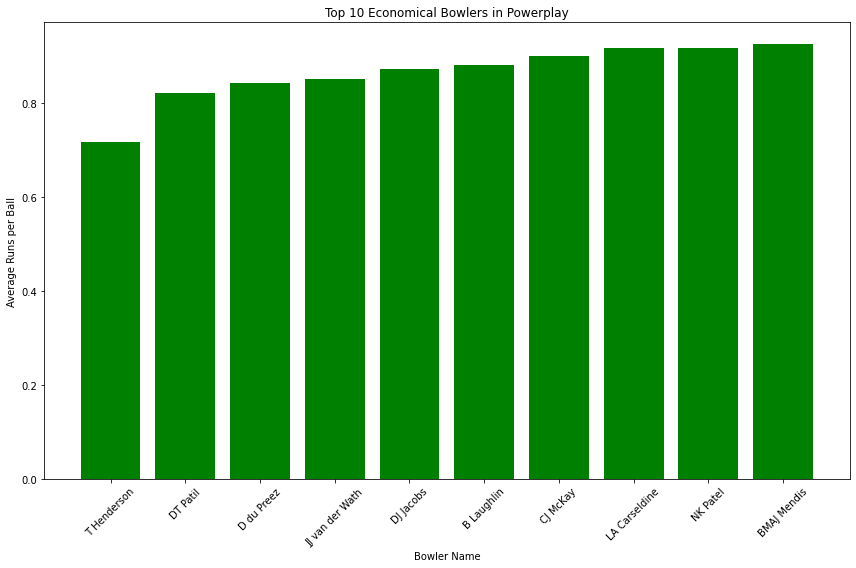

In [0]:
# Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark DataFrame 
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using matplotlib
plt.figure(figsize=(12, 8))
# Limiting to top 10 for clarity in the plot 
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='green')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Top 10 Economical Bowlers in Powerplay')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
# Execute SQL Query 
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS match_played, 
       SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS toss_win_match_played
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY toss_win_match_played DESC
""")

# Display the result
display(team_toss_win_performance)

team1,match_played,toss_win_match_played
Chennai Super Kings,37,27
Mumbai Indians,42,26
Kolkata Knight Riders,36,24
Royal Challengers Bangalore,34,19
Delhi Daredevils,36,17
Rajasthan Royals,25,16
Kings XI Punjab,32,14
Sunrisers Hyderabad,16,8
Deccan Chargers,22,6
Rising Pune Supergiants,6,4


Index(['team1', 'match_played', 'toss_win_match_played'], dtype='object')


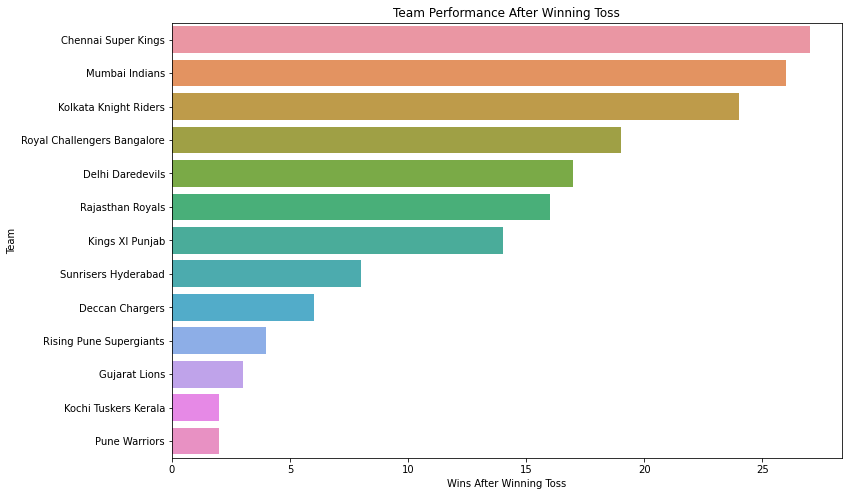

In [0]:
# Ensure team_toss_win_performance is a Spark DataFrame
team_toss_win_performance = spark.createDataFrame(team_toss_win_performance)

# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Check the column names
print(team_toss_win_pd.columns)

# Plot 
plt.figure(figsize=(12, 8))
sns.barplot(
    x='toss_win_match_played', 
    y='team1', 
    data=team_toss_win_pd
)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()

In [0]:
# Execute SQL Query
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency
FROM df 
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY frequency DESC
""")


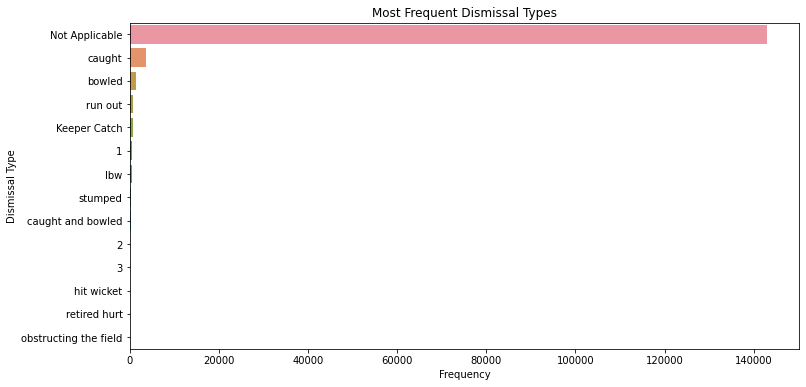

In [0]:
# Convert to Pandas DataFrame
dismissal_types_pd = dismissal_types.toPandas()

# PLOT 
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd)
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()


In [0]:
# Execute SQL Query
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS avg_score, MAX(total_runs) AS max_score
FROM (
  SELECT df.match_id, match.venue_name, SUM(df.runs_scored) AS total_runs
  FROM df
  JOIN match ON df.match_id = match.match_id
  GROUP BY df.match_id, matCh.venue_name
)
GROUP BY venue_name
ORDER BY avg_score DESC
""")

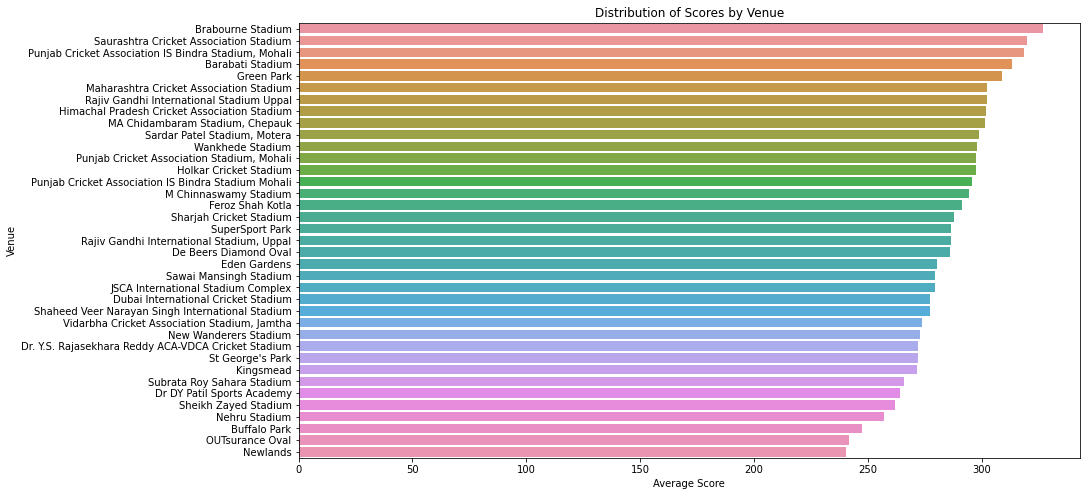

In [0]:
# Convert to Pandas DataFrame
scores_by_venue_pd = scores_by_venue.toPandas()

# PLOT 
plt.figure(figsize=(14, 8))
sns.barplot(x='avg_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

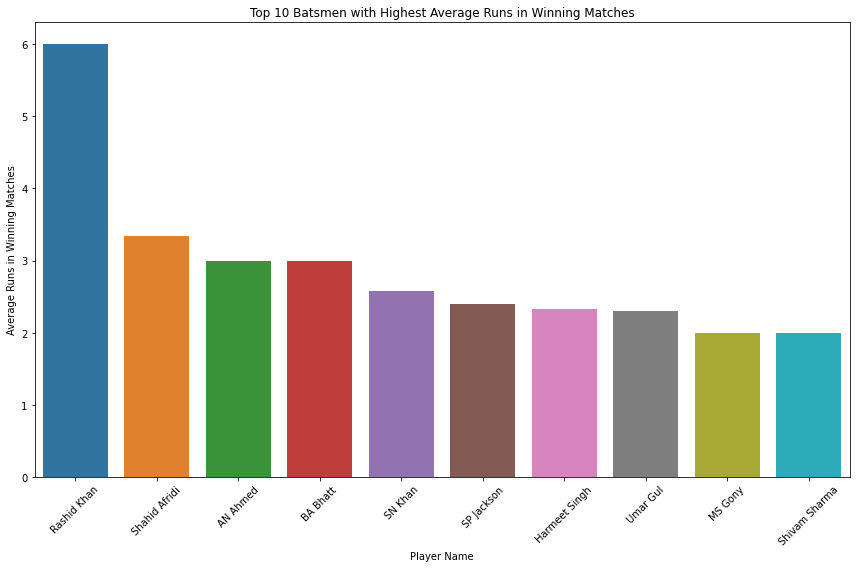

In [0]:
average_runs_pd = average_runs_in_wins.toPandas()

# Using Seaborn to plot average runs in winning matches 
plt.figure(figsize=(12, 8))
top_scores = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scores)
plt.title('Top 10 Batsmen with Highest Average Runs in Winning Matches')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Winning Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()